In [31]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [32]:
df1 = pd.read_csv('datos_veh32.csv',sep=';' )
df2 = pd.read_csv('datos_veh33.csv',sep=';' )

In [33]:
df1.head(10)

,timestep_time,vehicle_angle,vehicle_id,vehicle_lane,vehicle_pos,vehicle_slope,vehicle_speed,vehicle_type,vehicle_x,vehicle_y
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
X1 = np.array(df1[["timestep_time", "vehicle_pos"]])
X2 = np.array(df2[["timestep_time", "vehicle_pos"]])

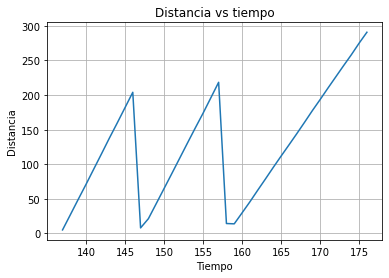

In [35]:
plt.plot(X1[:, 0], X1[:, 1])
plt.title('Distancia vs tiempo') 
plt.xlabel('Tiempo')
plt.ylabel('Distancia')
plt.grid()

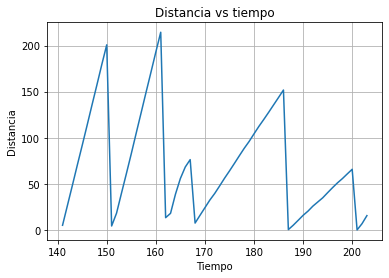

In [36]:
plt.plot(X2[:, 0], X2[:, 1])
plt.title('Distancia vs tiempo') 
plt.xlabel('Tiempo')
plt.ylabel('Distancia')
plt.grid()

In [37]:
X1 = np.array(df1[["vehicle_x", "vehicle_y"]]) #Veh32
X2 = np.array(df2[["vehicle_x", "vehicle_y"]]) #Veh33

In [50]:
X1[148]

array([ 454.15, 2421.36])

Text(405.07, 2211.81, 'P2')

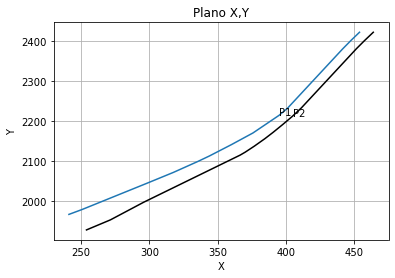

In [54]:
plt.plot(X1[148:, 0], X1[148:, 1],X2[152:, 0], X2[152:, 1],'k')
plt.title('Plano X,Y') 
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.text(395.05,2213.62,r"P1")
plt.text(405.07,2211.81,r"P2")